<a href="https://colab.research.google.com/github/ArtiusPhoenix/BigData/blob/main/BigDataTP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Importacion de los datos que se utilizaran (sUBIDOS a Drive)
dataset = "/content/drive/MyDrive/Crimenes.csv"
data = pd.read_csv(dataset)

In [4]:
#Explorar el conjunto de datos del CSV
print(data.head())
print(data.describe())

       Estado  Asesinatos  Asaltos  Poblacion Urbana  Violaciones
0     Alabama        13.2      236                58         21.2
1      Alaska        10.0      263                48         44.5
2     Arizona         8.1      294                80         31.0
3    Arkansas         8.8      190                50         19.5
4  California         9.0      276                91         40.6
       Asesinatos     Asaltos  Poblacion Urbana  Violaciones
count    50.00000   50.000000         50.000000    50.000000
mean      7.78800  170.760000         65.540000    21.232000
std       4.35551   83.337661         14.474763     9.366385
min       0.80000   45.000000         32.000000     7.300000
25%       4.07500  109.000000         54.500000    15.075000
50%       7.25000  159.000000         66.000000    20.100000
75%      11.25000  249.000000         77.750000    26.175000
max      17.40000  337.000000         91.000000    46.000000


In [5]:
#Seleccionar las caracteristicas relevantes para clustering.
features = data[['Asesinatos', 'Asaltos', 'Poblacion Urbana']]

#Metodo del codo para encontrar el numero optimo de clusteres.
#la inercia es una medida de que tan dispersos estan los puntos de datos dentro de cada cluster.
inertia = []
#a medida que aumentamos el numero de clusteres la inercia disminuira.

In [6]:
#Probamos valores de K desde 1 hasta 10 (puedes ajustar este limite).
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

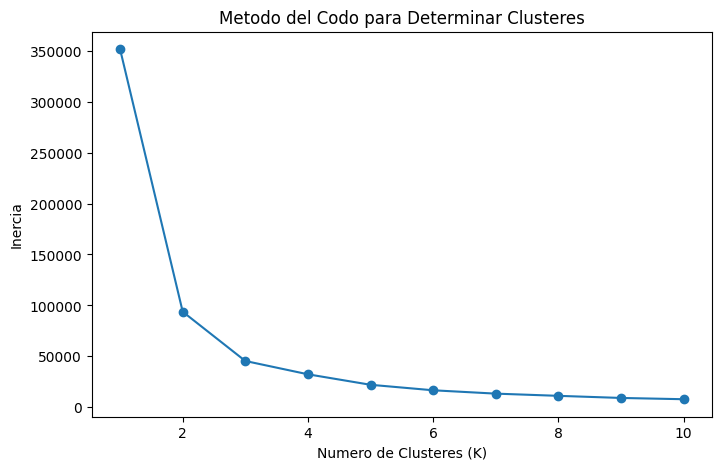

In [16]:
#Creamos una curva del codo.

#En este caso elegimos el metodo del codo para determinar el número optimo de clusters en el algoritmo KMeans
#esta técnica analiza como cambia la inercia (suma de cuadrados dentro del cluster) al variar el numero de clusters.

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metodo del Codo para Determinar Clusteres')
plt.xlabel('Numero de Clusteres (K)')
plt.ylabel('Inercia')
plt.show()

#El punto en el que se observa un "codo" en la grafica indica un numero adecuado de clusters.

In [8]:
#Elegir el numero de clusteres basado en el codo identificado en la grafica.
#En este caso visualmente el codo puede estar alrededor de K=2.
K = 2  #Ajustado a partir de 2

#Al revisar la grafica generada con el codigo visualmente se identifico un codo alrededor de K=2.
#lo que sugiere que este podria ser el numero optimo de clusters para nuestro conjunto de datos de crimenes.
#este enfoque es intuitivo y proporciona una forma efectiva de tomar decisiones informadas sobre la cantidad adecuada de clusters.

# Aplicar el algoritmo de clustering (KMeans en este caso) con el numero optimo de clusters.
kmeans = KMeans(n_clusters=K, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


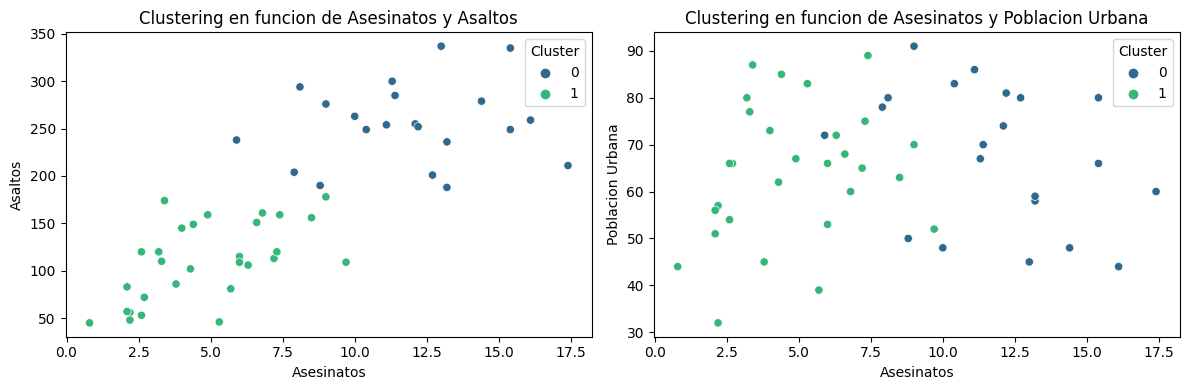

In [18]:
# Visualizar los resultados del clustering en relaciOn con diferentes caracteristicas.
plt.figure(figsize=(12, 4))

# Visualización para 'Asesinatos' y 'Asaltos'.
plt.subplot(1, 2, 1)
sns.scatterplot(x='Asesinatos', y='Asaltos', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering en funcion de Asesinatos y Asaltos')
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')

# Visualización para 'Asesinatos' y 'Poblacion Urbana'.
plt.subplot(1, 2, 2)
sns.scatterplot(x='Asesinatos', y='Poblacion Urbana', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering en funcion de Asesinatos y Poblacion Urbana')
plt.xlabel('Asesinatos')
plt.ylabel('Poblacion Urbana')

#Este codigo utiliza graficos de dispersion para visualizar los resultados del clustering en relacion a las columnas del CSV
#('Asesinatos', 'Asaltos', 'Poblacion Urbana').

#Cada punto en el grafico representa una observación, y el color indica a que cluster pertenece segun el algoritmo de KMeans.

#Los graficos estan para comparar las relaciones entre 'Asesinatos' y 'Asaltos', así como 'Asesinatos' y 'Poblacion Urbana'.

#Ajustar el diseño para mejorar la presentacion.
plt.tight_layout()
plt.show()

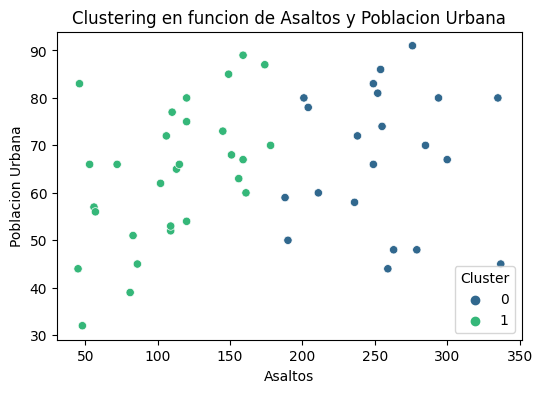

In [19]:
# Visualización para 'Asaltos' y 'Poblacion Urbana'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Asaltos', y='Poblacion Urbana', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering en funcion de Asaltos y Poblacion Urbana')
plt.show()

#En este codigo se realiza una visualizacion bidimensional utilizando un grafico de dispersion para representar la relacion entre
#'Asaltos' y 'Poblacion Urbana' en función de los clústeres asignados por el algoritmo KMeans.